# Q4

In [1]:
import numpy as np
import pandas as pd
# Flights from Houston,TX data set
flights = pd.read_csv("https://github.com/kiat/Elements-of-Data-Analytics/blob/main/datasets/airline/HoustonAirline.csv?raw=true") 
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,4,5,1910.0,1910,2025.0,2025,WN,823,...,6.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,4,5,1345.0,1345,1453.0,1500,WN,901,...,3.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,4,5,736.0,735,839.0,850,WN,957,...,3.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,4,5,1603.0,1550,1647.0,1635,WN,231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,4,5,2105.0,2105,2151.0,2150,WN,570,...,7.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241100,2008,12,12,5,1122.0,1040,1418.0,1342,DL,50,...,9.0,15.0,0,NaN,0,3.0,0.0,0.0,0.0,33.0
241101,2008,12,12,5,546.0,545,1011.0,849,DL,668,...,16.0,86.0,0,NaN,0,0.0,0.0,82.0,0.0,0.0
241102,2008,12,12,5,1114.0,1050,1406.0,1349,DL,1292,...,11.0,8.0,0,NaN,0,3.0,0.0,0.0,0.0,14.0
241103,2008,12,13,6,1612.0,1614,1910.0,1919,DL,8,...,16.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [2]:
flights.groupby("TailNum").size().idxmax()

'N14937'

Regardless of cancellation, it is still N14937

In [3]:
flights[flights.Cancelled == 0].groupby("TailNum").size().idxmax()

'N14937'

In [4]:
flights.TailNum.value_counts().idxmax()

'N14937'

# Q5

In [5]:
flights.groupby("DayOfWeek").size().idxmax()

5

In [6]:
flights.DayOfWeek.value_counts().idxmax()

5

# Q6

In [7]:
flights_subset = flights[(flights.DepDelay > 1) & (flights.ArrDelay > 1)]

In [8]:
corr = flights_subset[["DepDelay", "ArrDelay"]].corr().at["DepDelay", "ArrDelay"]

In [9]:
corr

0.9324279653679256

# Q7

In [10]:
pd.set_option('use_inf_as_na',True)
flights_subset2 = flights.dropna(subset=["ActualElapsedTime", "Distance"])

In [11]:
corr2 = flights_subset2[["ActualElapsedTime", "Distance"]].corr().at["ActualElapsedTime", "Distance"]
corr2

0.9667586070679305

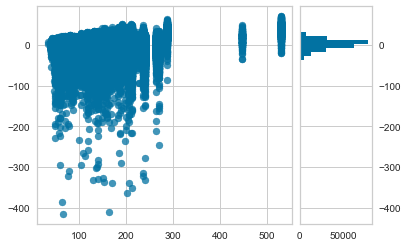

In [12]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

X = flights_subset2[["Distance"]]
y = flights_subset2[["ActualElapsedTime"]]

model = LinearRegression()
visualizer = ResidualsPlot(model).fit(X, y)


In [13]:
visualizer.coef_[0][0]

0.1275998228299435

In [14]:
visualizer.intercept_[0]

30.762810091207655

0.9346222043399015

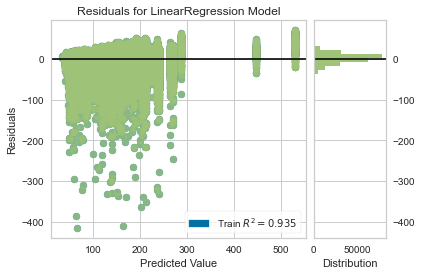

In [15]:
visualizer.show()
visualizer.score(X, y)

The residuals skew heavily downward and have higher variance at lower predicted values

# Q8 (Supplement)

In [16]:
learningRate = 0.04

x = np.array([1, 2, 3, 4, 5])
y = np.array([101, 111, 122, 133, 144])

m_current = 0.2
b_current = 50

y_prediction = m_current * x + b_current

# calculate gradients. 
m_gradient = np.mean (x*(y_prediction - y) )
b_gradient = np.mean (y_prediction - y)

# update the weights - Regression Coefficients 
m_current = m_current - learningRate * m_gradient
b_current = b_current - learningRate * b_gradient

print(m_current, m_gradient)
print(b_current, b_gradient)



9.639999999999999 -236.0
52.864 -71.6
